In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv("train.csv")
train.head()


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
test = pd.read_csv("test.csv")
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [4]:
train.shape

(8523, 12)

In [5]:
test.shape

(5625, 11)

In [6]:
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [7]:
test.isnull().sum()

Item_Identifier                 0
Item_Weight                   964
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1593
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [8]:
train.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [9]:
test.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
dtype: object

# HANDLING Null Values and Fixing Irreularites:

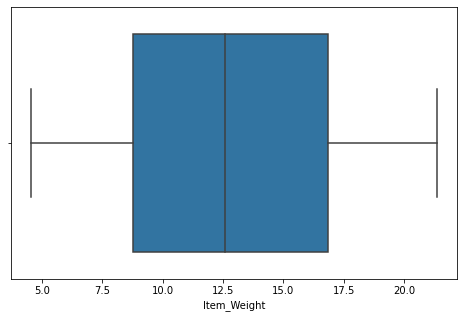

In [10]:

plt.figure(figsize=(8,5))
sns.boxplot(x="Item_Weight",data=train)
plt.show()

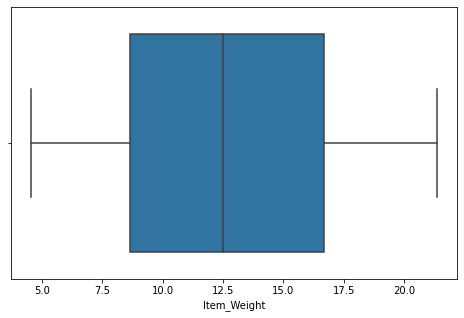

In [11]:
plt.figure(figsize=(8,5))
sns.boxplot(x="Item_Weight",data=test)
plt.show()

In [12]:
train["Item_Weight"] = train["Item_Weight"].fillna(train["Item_Weight"].mean())
test["Item_Weight"] = test["Item_Weight"].fillna(test["Item_Weight"].mean())

In [13]:
train["Item_Weight"].isnull().sum(),test["Item_Weight"].isnull().sum()

(0, 0)

In [14]:
train["Outlet_Size"].isnull().sum(),test["Outlet_Size"].isnull().sum()

(2410, 1593)

In [15]:
train["Outlet_Size"].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [16]:
test["Outlet_Size"].value_counts()

Medium    1836
Small     1581
High       615
Name: Outlet_Size, dtype: int64

In [17]:
train["Outlet_Size"] = train["Outlet_Size"].fillna(train["Outlet_Size"].mode()[0])
test["Outlet_Size"] = test["Outlet_Size"].fillna(test["Outlet_Size"].mode()[0])

In [18]:
train.isnull().sum()


Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [19]:
train["Item_Fat_Content"].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [20]:
test["Item_Fat_Content"].value_counts()

Low Fat    3366
Regular    1909
LF          207
reg          77
low fat      66
Name: Item_Fat_Content, dtype: int64

In [21]:
train["Item_Fat_Content"].replace(["LF","reg","low fat"],["Low Fat","Regular","Low Fat"],inplace=True)
test["Item_Fat_Content"].replace(["LF","reg","low fat"],["Low Fat","Regular","Low Fat"],inplace=True)

In [22]:
train.Item_Fat_Content.value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [23]:
test.Item_Fat_Content.value_counts()

Low Fat    3639
Regular    1986
Name: Item_Fat_Content, dtype: int64

# Exploratory Data Analysis: 

# 1. Anaysis on categogical features:

In [24]:
categorical = train.select_dtypes(include=[object])
print(categorical.shape[1],"Categorical features present in the Dataset,They are : ")
print('\t'+'\n'.join(categorical.columns)+"\n")

7 Categorical features present in the Dataset,They are : 
	Item_Identifier
Item_Fat_Content
Item_Type
Outlet_Identifier
Outlet_Size
Outlet_Location_Type
Outlet_Type



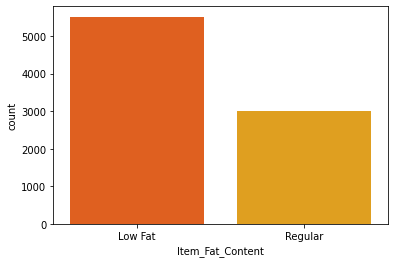

In [25]:
plt.Figure(figsize=(8,5))
sns.countplot(data=train, x = "Item_Fat_Content", palette='autumn')
plt.show()

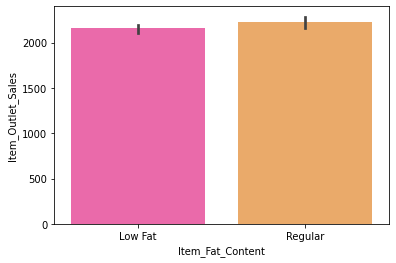

In [26]:
plt.Figure(figsize=(8,5))
sns.barplot(data=train,x="Item_Fat_Content",y="Item_Outlet_Sales",palette='spring')
plt.show()

# Observation :
     -> The items count are more of Low fat.
     -> But item Outlet sales are equal for low fat and regular. 

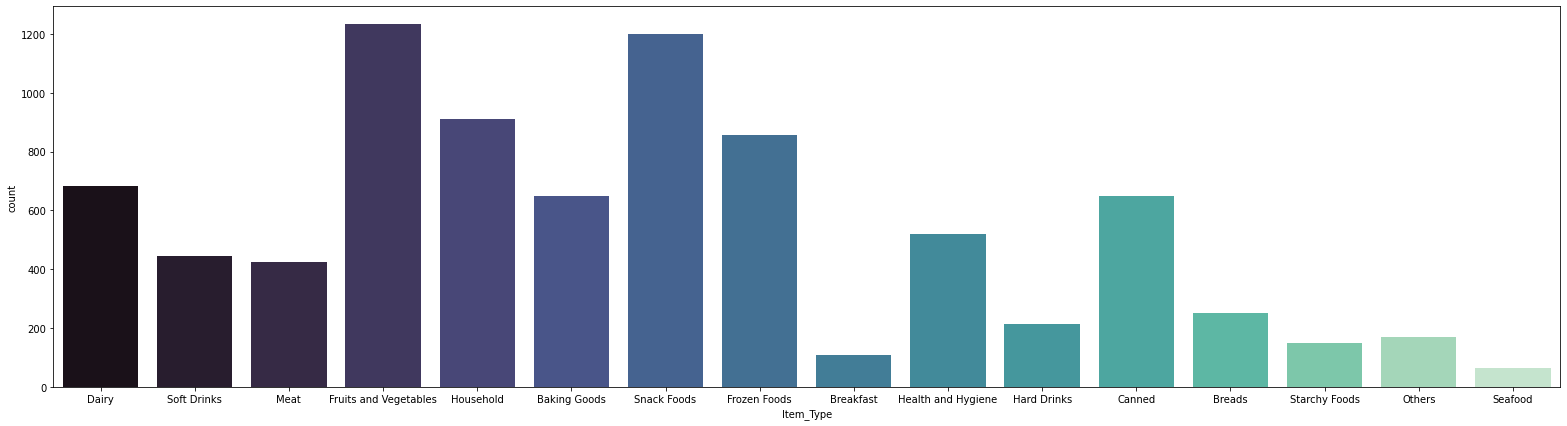

In [27]:
plt.figure(figsize=(27,7))
sns.countplot(x='Item_Type',data=train,palette='mako')
plt.show()

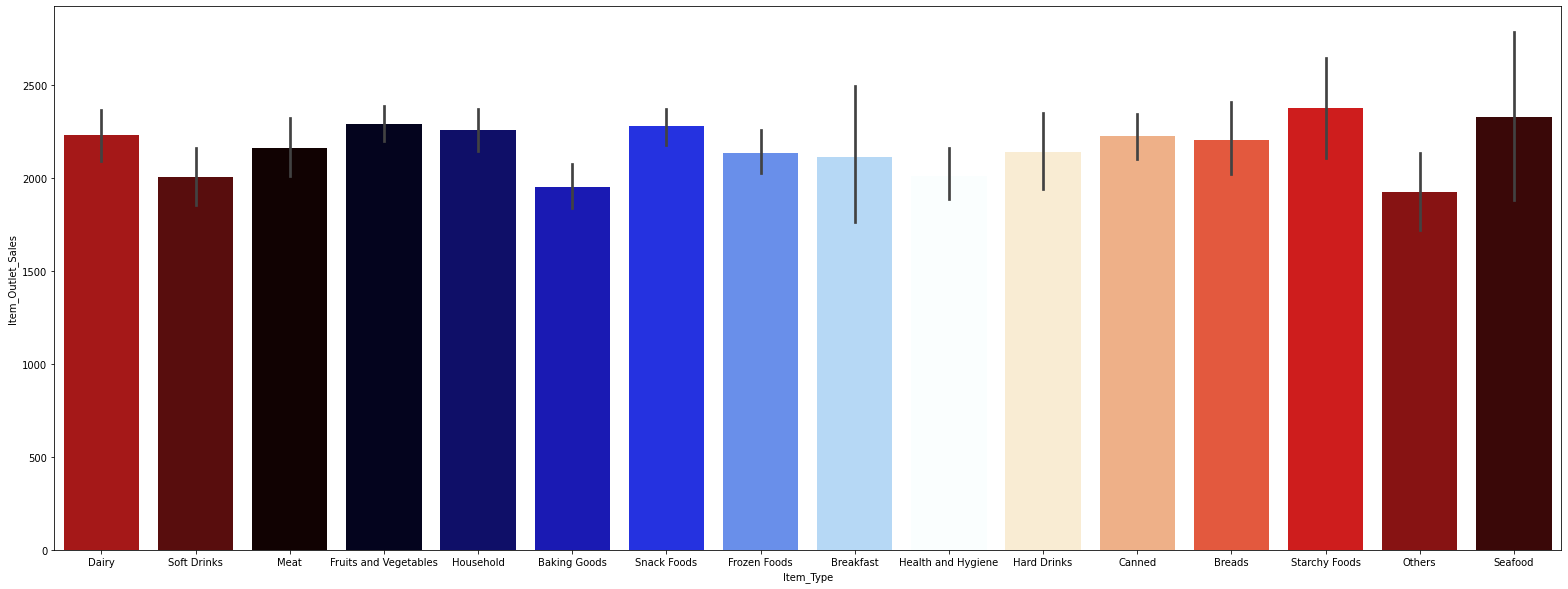

In [28]:
plt.figure(figsize=(27,10))
sns.barplot(x="Item_Type",y="Item_Outlet_Sales",data=train,palette='flag')
plt.show()

# Observation :
        -> The stock of fruits and vegetables, sanckfoods but the sales of seafood and strachy foods seems higher,
           hence the sales can be improved with having stock of products that are bought most by customers.

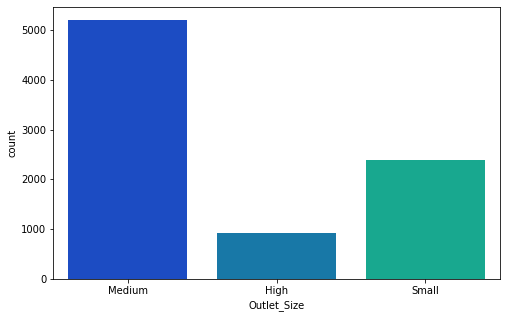

In [29]:
plt.figure(figsize=(8,5))
sns.countplot(x='Outlet_Size',data=train,palette='winter')
plt.show()

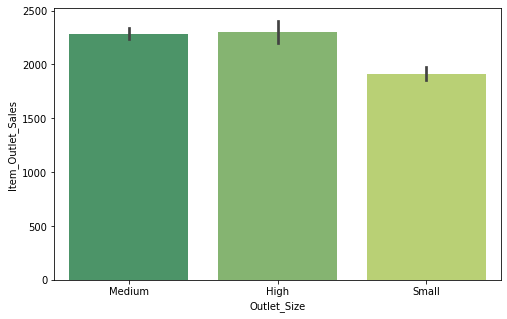

In [30]:
plt.figure(figsize=(8,5))
sns.barplot(x='Outlet_Size',y='Item_Outlet_Sales',data=train,palette='summer')
plt.show()

# Observation :
        -> The Outlets are more of Medium.
        -> But sales is maximum for Medium and High outlets so may be with increase in High size outlets can 
           improve the sales of outlets.

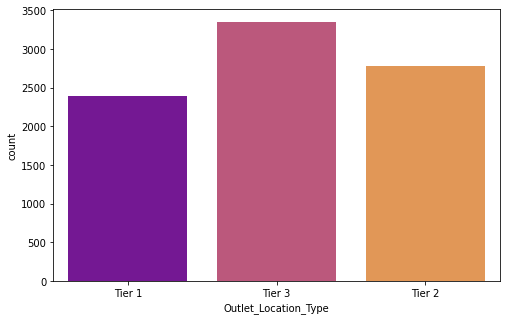

In [31]:
plt.figure(figsize=(8,5))
sns.countplot(x='Outlet_Location_Type',data=train,palette='plasma')
plt.show()

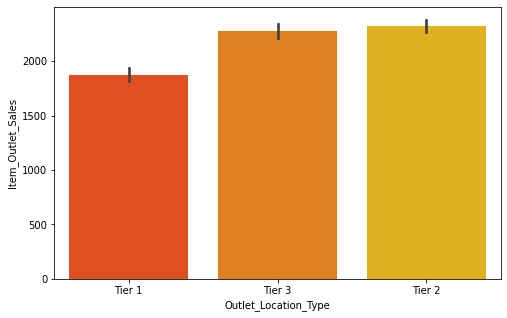

In [32]:
plt.figure(figsize=(8,5))
sns.barplot(x='Outlet_Location_Type',y='Item_Outlet_Sales',data=train,palette='autumn')
plt.show()

# Observations:
     -> The Outlet Sales tend to be high for Tier3 and Tier 2 location types
     -> But we have only Tier3 locations maximum Outlets

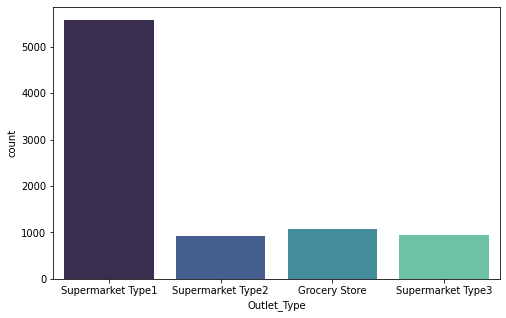

In [33]:
plt.figure(figsize=(8,5))
sns.countplot(x='Outlet_Type',data=train,palette='mako')
plt.show()

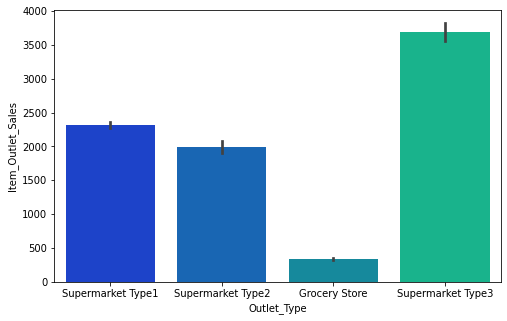

In [34]:
plt.figure(figsize=(8,5))
sns.barplot(x='Outlet_Type',y='Item_Outlet_Sales',data=train,palette='winter')
plt.show()

# Observation :
            -> The Outlets are more of supermarket type1.\
            -> But sales of supermarket type3 is more.

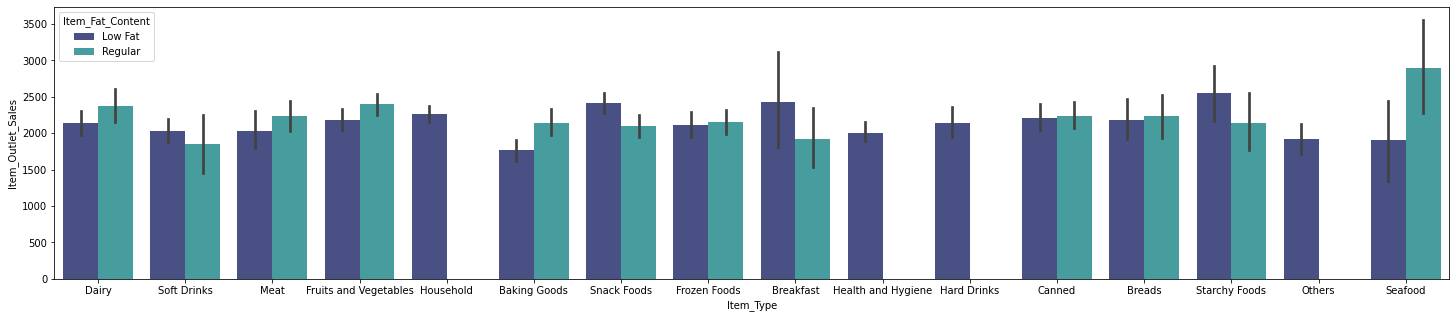

In [35]:
plt.figure(figsize=(25,5))
sns.barplot(x='Item_Type',y='Item_Outlet_Sales',hue='Item_Fat_Content',data=train,palette='mako')
plt.show()

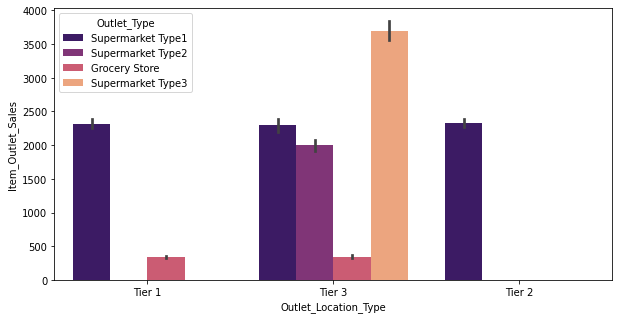

In [36]:
plt.figure(figsize=(10,5))
sns.barplot(x='Outlet_Location_Type', y='Item_Outlet_Sales',hue='Outlet_Type',data=train,palette='magma')
plt.show()

# Observation:
      -> The Tier-3 location type has all types of Outlet type and has high sales margin.

# 2. analysis on numerical features :

In [37]:
numerical= train.select_dtypes(include =[float,int])
print("Numerical Features in Train Set :")
print('\t'+'\n\t'.join(numerical.columns)+"\n","outlet_establishment_year")

Numerical Features in Train Set :
	Item_Weight
	Item_Visibility
	Item_MRP
	Item_Outlet_Sales
 outlet_establishment_year


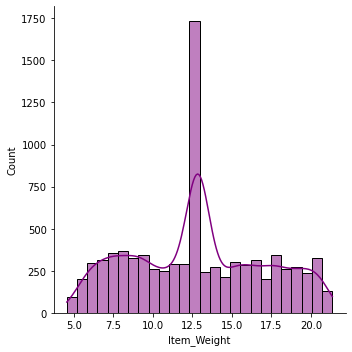

In [38]:
sns.displot(x=train.Item_Weight, color="purple", kde=True)

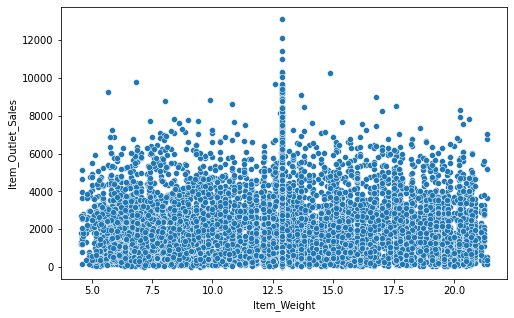

In [39]:
plt.figure(figsize=(8,5))
sns.scatterplot(x="Item_Weight",y="Item_Outlet_Sales",data=train,)
plt.show()

# observation:
        -> There are more product of 12.5 weight and sales of 12.5 is also high.

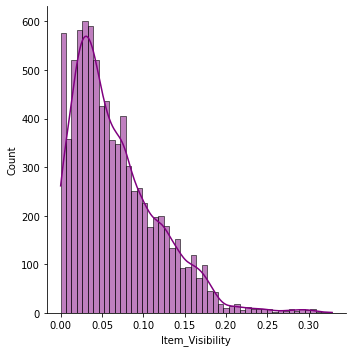

In [40]:
sns.displot(x=train.Item_Visibility, color="purple",kde=True)

In [41]:
train.Item_Visibility.min()

0.0

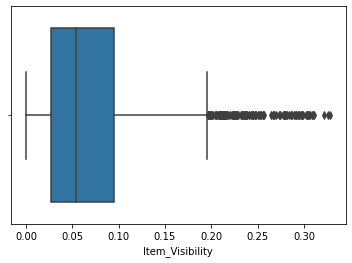

In [42]:
sns.boxplot(x='Item_Visibility',data=train)
plt.show()

# As there are outliers we will treat outliers as null values will fill it with median:

In [43]:
train["Item_Visibility"] = train["Item_Visibility"].replace(0,train["Item_Visibility"].median())
test["Item_Visibility"] = test["Item_Visibility"].replace(0,train["Item_Visibility"].median())

In [44]:
train['Item_Visibility'].min()

0.003574698

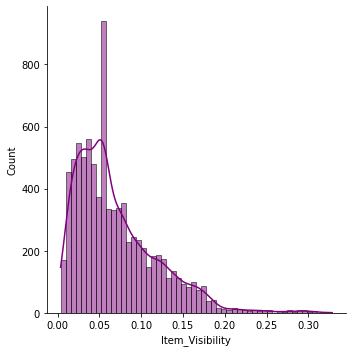

In [45]:
sns.displot(x=train.Item_Visibility, color="purple",kde=True)

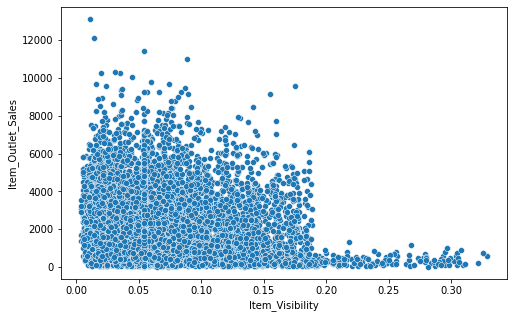

In [46]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='Item_Visibility',y='Item_Outlet_Sales',data=train)
plt.show()

# Observation :
    -> more items have visibilty from 0 to 0.2
    -> sales of item visibility from 0 to 0.2
 

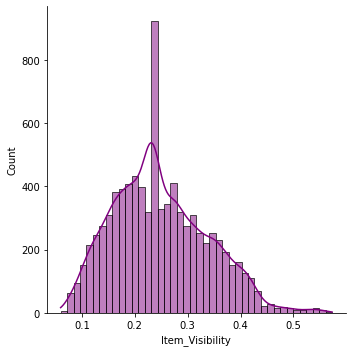

In [47]:
sns.displot(x=np.sqrt(train.Item_Visibility), color='purple', kde=True)
plt.show()

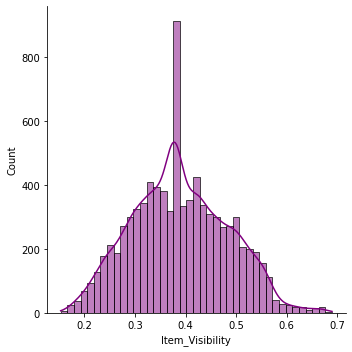

In [48]:
sns.displot(x=np.cbrt(train.Item_Visibility), color='purple', kde=True)
plt.show()

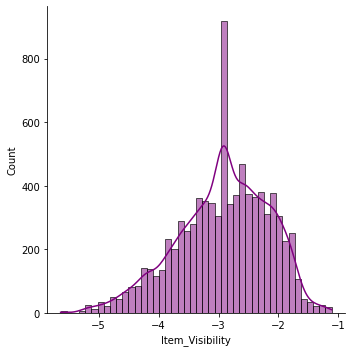

In [49]:
sns.displot(x=np.log(train.Item_Visibility), color='purple', kde=True)
plt.show()

In [50]:
train['Item_Visibility'] = np.cbrt(train['Item_Visibility'])

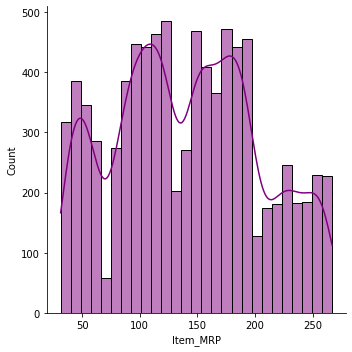

In [51]:
sns.displot(x=train.Item_MRP,color='purple',kde=True)
plt.show()

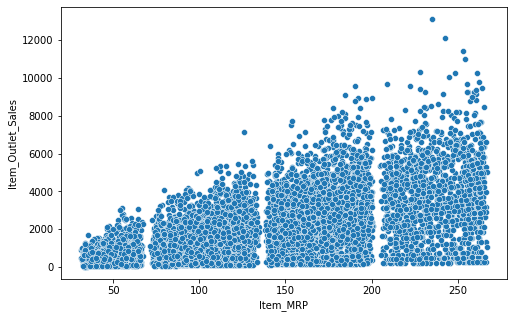

In [52]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='Item_MRP',y='Item_Outlet_Sales',data=train)
plt.show()

# Observation :
    -> There are good amount of product of price 50,100,150,and 180
    -> But sales of product ranging from 200-250 is high.

In [53]:
train['Years_Established'] = train['Outlet_Establishment_Year'].apply(lambda x: 2022 - x) 
test['Years_Established'] = test['Outlet_Establishment_Year'].apply(lambda x: 2022 - x)

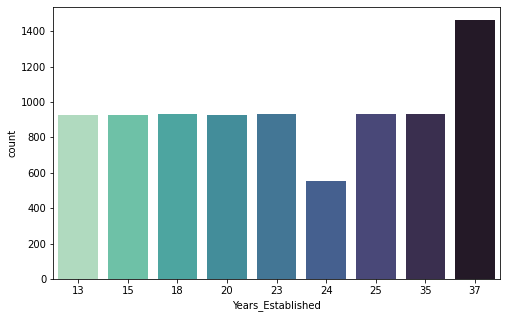

In [54]:
plt.figure(figsize=(8,5))
sns.countplot(x='Years_Established',data=train,palette='mako_r')
plt.show()

<AxesSubplot:xlabel='Years_Established', ylabel='Item_Outlet_Sales'>

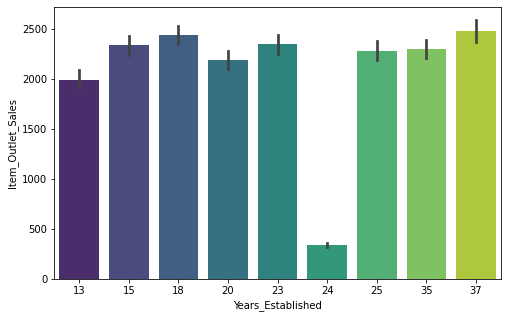

In [55]:
plt.figure(figsize=(8,5))
sns.barplot(x='Years_Established',y='Item_Outlet_Sales',data=train,palette='viridis')

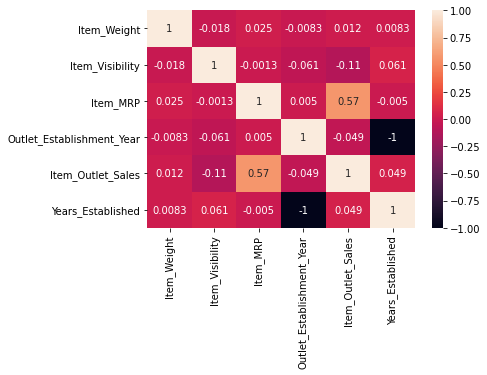

In [56]:
sns.heatmap(train.corr(),annot=True)
plt.show()

# Feature engineering :

In [57]:
from sklearn.preprocessing import LabelEncoder

In [58]:
dum = LabelEncoder()
for i in categorical.columns:
    train[i] = dum.fit_transform(train[i])
for i in categorical.columns:
    test[i] = dum.fit_transform(test[i])

In [59]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Years_Established
0,156,9.30,0,0.252232,4,249.8092,9,1999,1,0,1,3735.1380,23
1,8,5.92,1,0.268136,14,48.2692,3,2009,1,2,2,443.4228,13
2,662,17.50,0,0.255913,10,141.6180,9,1999,1,0,1,2097.2700,23
3,1121,19.20,1,0.377815,6,182.0950,0,1998,1,2,0,732.3800,24
4,1297,8.93,0,0.377815,9,53.8614,1,1987,0,2,1,994.7052,35


In [60]:
train.drop(['Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year'],axis=1,inplace=True)
test.drop(['Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year'],axis=1,inplace=True)

In [61]:
train.tail()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Years_Established
8518,6.865,0,0.384362,13,214.5218,0,2,1,2778.3834,35
8519,8.380,1,0.360838,0,108.1570,1,1,1,549.2850,20
8520,10.600,0,0.327686,8,85.1224,2,1,1,1193.1136,18
8521,7.210,1,0.525625,13,103.1332,1,2,2,1845.5976,13
8522,14.800,0,0.355368,14,75.4670,2,0,1,765.6700,25


In [62]:
x = train.drop(columns=["Item_Outlet_Sales"]) 
y = train.Item_Outlet_Sales

# FEATURE SCALING :
 AS WE HAVE A NORMAL DISTRIBUTION WE WILL USE STANDARDIZATION

In [63]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import  StandardScaler

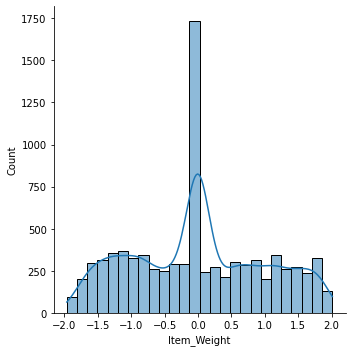

In [64]:
standard_Item_Weight = StandardScaler()
standard_Item_Weight.fit(x[['Item_Weight']])
x['Item_Weight'] =  standard_Item_Weight.transform(x[['Item_Weight']])
sns.displot(x.Item_Weight, kde=True)
plt.show()


In [65]:
standard_Item_Weight.mean_

array([12.85764518])

In [66]:
test['Item_Weight'] = standard_Item_Weight.transform(test[['Item_Weight']])

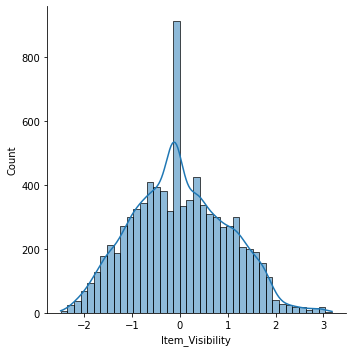

In [67]:
standard_Item_Visibility = StandardScaler()
standard_Item_Visibility.fit(x[['Item_Visibility']])
x['Item_Visibility'] = standard_Item_Visibility.transform(x[['Item_Visibility']])
sns.displot(x.Item_Visibility,kde=True)
plt.show()

In [68]:
standard_Item_Visibility.mean_

array([0.38903291])

In [69]:
test['Item_Visibility'] = standard_Item_Visibility.transform(test[['Item_Visibility']])

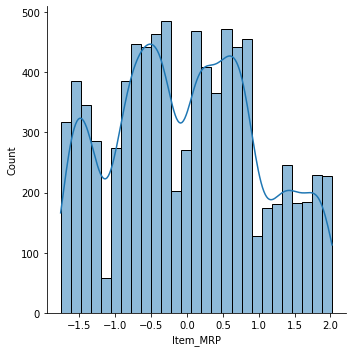

In [70]:
standard_Item_MRP = StandardScaler()
standard_Item_MRP.fit(x[['Item_MRP']])
x['Item_MRP'] = standard_Item_MRP.transform(x[['Item_MRP']])
sns.displot(x.Item_MRP,kde=True)
plt.show()


In [71]:
standard_Item_MRP.mean_

array([140.99278198])

In [72]:
test['Item_MRP'] = standard_Item_MRP.transform(test[['Item_MRP']])

In [73]:
x.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Years_Established
0,-0.841872,0,-1.446573,4,1.747454,1,0,1,23
1,-1.641706,1,-1.278398,14,-1.489023,1,2,2,13
2,1.098554,0,-1.407654,10,0.010040,1,0,1,23
3,1.500838,1,-0.118621,6,0.660050,1,2,0,24
4,-0.929428,0,-0.118621,9,-1.399220,0,2,1,35


In [74]:
test.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Years_Established
0,1.867626,0,-4.033762,13,-0.532035,1,0,1,23
1,-1.078509,1,-3.707409,4,-0.861920,1,1,1,15
2,0.412306,0,-3.060819,11,1.618094,1,2,0,24
3,-1.311597,0,-3.951034,13,0.225484,1,1,1,15
4,-0.035960,1,-2.859649,4,1.497272,1,2,3,37


# cross_validation :

In [75]:
def score(model, x=x, y=y):
    print("Average R2 score: ", np.average(cross_val_score(model,x,y,cv=10)))
    print("Average root mean square error: ",np.average(cross_val_score(model,x,y,cv=10,scoring= 'neg_root_mean_squared_error')))

# 1. Linear Regression :

In [76]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
LR = LinearRegression(positive=True)
LR.fit(x,y)
score(LR)

Average R2 score:  0.48253519339515416
Average root mean square error:  -1225.8561623734372


# 2. Polynomial Regression :

In [77]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
poly = PolynomialFeatures(3)
poly_x = poly.fit_transform(x)
PR = LinearRegression()
PR.fit(poly_x,y)
score(PR,poly_x,y)

Average R2 score:  0.5962457409400024
Average root mean square error:  -1082.1923938191721


In [78]:
poly = PolynomialFeatures(2)
poly_x = poly.fit_transform(x)
PR = LinearRegression()
PR.fit(poly_x,y)
score(PR,poly_x,y)

Average R2 score:  0.5905048467747488
Average root mean square error:  -1089.9195063524146


# 3.Random Forest Regressor :  

In [79]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(x,y)
score(rfr)

Average R2 score:  0.5513327404604051
Average root mean square error:  -1141.0217163237194


In [80]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(max_depth=5)
rfr.fit(x,y)
score(rfr)

Average R2 score:  0.5957157474787724
Average root mean square error:  -1083.395203956581


In [81]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(max_depth = 5)
gbr.fit(x,y)
score(gbr)

Average R2 score:  0.5831616712136583
Average root mean square error:  -1100.0042521924934


array([1592.31436746, 1428.27127128,  550.67222765, ..., 3043.74873119,
       3427.23515025, 4732.10119353])